# Project: Investigating not showing for medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



## Introduction <a name="introduction"></a>
>
>**Intro to the dataset:** This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. With 9 factors describing the patient Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handca and whether the patient recieved an SMS or not.
>The main quest here is to discuss how these factors affects showing up for medical appointments
>
**Possible questions:**
- Is not showing for appintments increases with certain types of illness? Does Alcoholism afects it?
- Does Alcoholism afects it?
- How having a scholarship affects it?
- Recieving an SMS effect?
- Is it increasing in certain neighbourhoods more than the others?
- Is the problem gender related?
- Is the problem age related?


In [148]:
# Import necessary packages and load `noshowappointments-kagglev2-may-2016.csv`
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Data Wrangling <a name="paragraph1"></a>

> **Note**: This section of the report is for loading data, checking for cleanliness, and then trimming and cleaning the dataset for analysis. 


### **General Properties**

In [149]:
# Loading data and printing out a few lines.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(3)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [150]:
# Performing operations to inspect data types and looking for instances of missing or possibly errant data.
# Understanding the data, checking for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [151]:
# Checking for duplicates
print('Duplicated values?: \n', df.duplicated().value_counts(), '\n')

# Count of values in each column
print('Count of values:')
df.nunique()

Duplicated values?: 
 False    110527
dtype: int64 

Count of values:


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [152]:
# Observing Min,Max and properties of the dataset 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### **Defining Functions**
Both bar and pie plots will be used several times for visualizing the data so, I'm making functions for each of them to avoid repeating the same code multible times 

In [153]:
# Bar plot function

def bar_plot(bar_type, tags, bar_values, second_bar_values, bar_label, second_bar_label, xbar_label, ybar_label, bar_title, bar_color, xdim, ydim, show_percent, double_bars ):
    sns.set_theme()
    plt.rcParams["figure.figsize"] = (xdim, ydim)
    # Vertical or horizontal? single or double bars?
    if double_bars == 0 :
        if bar_type == 1 :
            bar_graph = plt.bar(tags,bar_values,0.5, color=bar_color,label= bar_label)
        else:
            bar_graph = plt.barh(tags,bar_values,0.5, color=bar_color,label= bar_label)
    
    else:
        X_axis = np.arange(len(tags))
        plt.bar(X_axis - 0.2, bar_values, 0.4, label = bar_label)
        plt.bar(X_axis + 0.2, second_bar_values, 0.4, label = second_bar_label)  
        plt.xticks(X_axis, tags)

    plt.xlabel(xbar_label, fontsize = 15)
    plt.ylabel(ybar_label, fontsize = 15)
    plt.title(bar_title, fontsize = 15)
    plt.legend()

    # Showing percentage on graph
    
    if show_percent == 1:
        ii = 0
        rounded_bar_values = [round(number, 2) for number in bar_values]
        for pp in bar_graph:
            width = pp.get_width()
            height = pp.get_height()
            x, y = pp.get_xy()
     
            plt.text(x+width/2,
                    y+height*1.01,
                    str(rounded_bar_values[ii])+'%',
                    ha='center',
                weight='bold')
            ii += 1
    plt.legend()
    plt.show()




In [154]:
# Pie plot function

def pie_plot(pie_values, pie_labels, pie_title):
    sns.set_theme()
    plt.rcParams["figure.figsize"] = (10,7)
    plt.pie(pie_values, labels = pie_labels, shadow = True, textprops={'fontsize': 14}, autopct='%1.2f%%');
    plt.title(pie_title,fontsize = 15)
    plt.legend();
    plt.show()




### **Investigation**
- Viewed a few columns to gain deeper understanding about the dataset
- Showed info about the data to check for null values
- Checked for the presence of duplicated data
- Got the number of unique values in each column, this helped in finding errors in columns that should've had only two unique values. This also helped understanding the dataset and getting to know what the data in each column meant
- Finally, ggot statistical info about the data, where the maximum and minimum values of certain columns helped in finding errors



### **Initial findings**
- No null values or duplicates found were found (all patients have different appointment ids)
- Minimum age came -1, so age will be checked so that it becomes within a real range
- Will check for Alcoholism under the age of 14
- Max for Handcap returned 4, it should be either 0 or 1
- No show column returns yes/no which isn't applicable in the analysis
- will check for duplicates based Scheduled day column


### Data Cleaning
- After inspeting the data in the previous section, we will be cleaning it according to the the notes mentioned above so that the data becomes easier to analyze

>#### 1- Age error
>Minimum age returned -1 so, we will be dropping any age below zero.

In [155]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
age_error = df['Age'].loc[df['Age'] < 0].index
df.drop(age_error, axis = 0, inplace=True)
print ('Minumum age after cleaning is {}'.format(min(df['Age'])))


Minumum age after cleaning is 0


>#### 2- Alcoholism Error
>According to:
>https://pubs.niaaa.nih.gov/publications/AA67/AA67.htm#:~:text=Research%20also%20shows%20that%20many,1965%20(7%2C8),
>the average age of first use of alcohol was about 14, so alcoholic children under age of 14 wiil be dropped, even if there were children under 14 drinking Alcohol it will be harder to form Alcohol dependence.

In [156]:
# Checking for Alcolism under age of 14
print ('There are {} child with Alcoholism uder the age of 14, this should be dropped'.format(df[df['Age'] < 14].Alcoholism.value_counts()[1]))

# Dropping wrong data 
df_age = df.query('Age < 14')
Alcoh_error = df_age[df_age['Alcoholism'] == 1].index
df.drop(Alcoh_error, axis = 0, inplace=True)



There are 15 child with Alcoholism uder the age of 14, this should be dropped


>#### 3- Handcap Error
>Maximum value for handcap returned 4, it should be either zero or one so we will be checking it and dropping any other value than 0 or 1.

In [157]:
# Checking for values other than 0 and 1 for Handcap
print('Handcap values before cleaning:')
print(df['Handcap'].value_counts())

#Dropping the wrong data
Handcap_error = df[df['Handcap'] > 1].index
df.drop(Handcap_error, axis = 0, inplace=True)

# Checking for values other than 0 and 1 for Handcap, again
print('Handcap values after cleaning:')
df['Handcap'].value_counts()


Handcap values before cleaning:
0    108270
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64
Handcap values after cleaning:


0    108270
1      2042
Name: Handcap, dtype: int64

>#### 4-Converting, ranaming NO-Show

In [158]:
# Renaming No-show column
df.rename(columns = {'No-show':'no_show', 'Hipertension': 'Hypertension'}, inplace = True)

# Converting Yes to 1, No to 0
df['no_show'] = df['no_show'].replace({'No': 0, 'Yes': 1}).astype(int)
print(df['no_show'].value_counts())

# Create dataframe with patient not showing for appointments
noshow_df = df.query('no_show == 1')

#view of the dataframe after cleaning
df.head(3)

0    88042
1    22270
Name: no_show, dtype: int64


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0


- First, I renamed the whole column from NO-show to no_show as the "-" sign will make the analysis harder.
- Then, I converted the values that represent True/False from yes/no into 0/1 which will make things easier in the next sections.
- Instead of slicing the main dataframe, I created a dataframe for patients who did'nt show for their appointments.

<a id='eda'></a>
## Exploratory Data Analysis

>Now after trimming and cleaning the dataset, we should move on to exploration. This section is for Computing statistics and creating visualizations with the goal of addressing the research questions posed in the Introduction section, starting with one variable at a time, and then following it up by looking at relationships between variables.

### **Does missing the appointments increase with certain types of illness? is Alcoholism affecting it?**


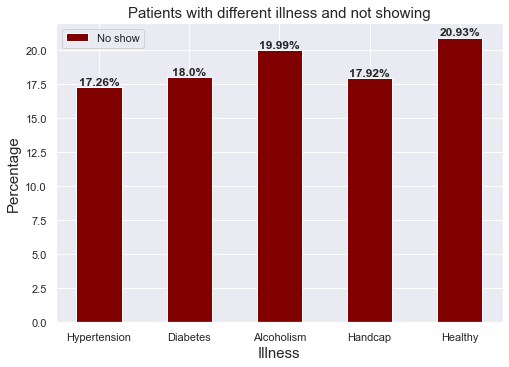

In [159]:
illness = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handcap']
ill = df[illness].sum()
noshow_ill = noshow_df[illness].sum()
percentage_noshow = (noshow_ill*100/ill).values.tolist()

#Inspecting patients with none of the above mentioned illness:
# No show and healthy
noshow_healthy = noshow_df.query('Hypertension == 0 & Diabetes == 0 & Alcoholism == 0 & Handcap == 0').shape[0]

#all healthy
healthy = df.query('Hypertension == 0 & Diabetes == 0 & Alcoholism == 0 & Handcap == 0').shape[0]
percentage_noshow_H = noshow_healthy*100/healthy
percentage_noshow.append(percentage_noshow_H)

# Plotting: Bar Chart
tags = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Healthy']
bar_plot(1, tags, percentage_noshow, None, 'No show', None, 'Illness', 'Percentage', "Patients with different illness and not showing", 'maroon', 8, 5.5 , 1, 0)


##### What do we get from here?
- People without any of the previous four types of illness (described as healthy) were more likely to miss their appointments,
  BUT, it's not by a huge amount so we can't move to conclusions from this result.
- Patients with Hypertension were the least to miss their appointments, and again, not by an amount that gives any kind of conclusions.

### **Scholarship Effect**
**About this scholarship:** Bolsa Família is a social welfare program of the Government of Brazil, part of the Fome Zero network of federal assistance programs. Bolsa Família provided financial aid to poor Brazilian families.

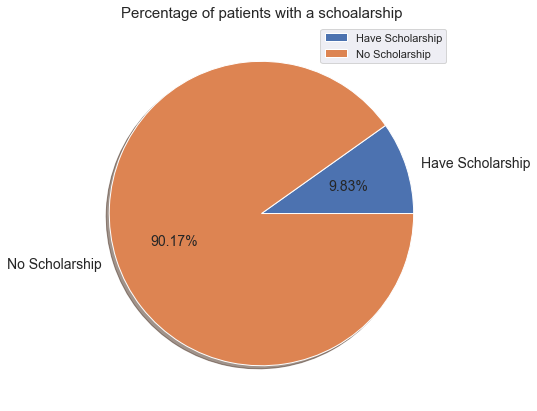

In [160]:
# Analyzing scholarship column
all_scholar = df.query('Scholarship == 1').shape[0]
all_noscholar = df.query('Scholarship == 0').shape[0]

# Plotting: Pie chart
pie_plot([all_scholar, all_noscholar], ['Have Scholarship','No Scholarship'], "Percentage of patients with a schoalarship")




10842 patient(s) have scholarships and 2577 of them missed the appointment
99470 patient(s) don't have scholarships and 19693 of them missed the appointment


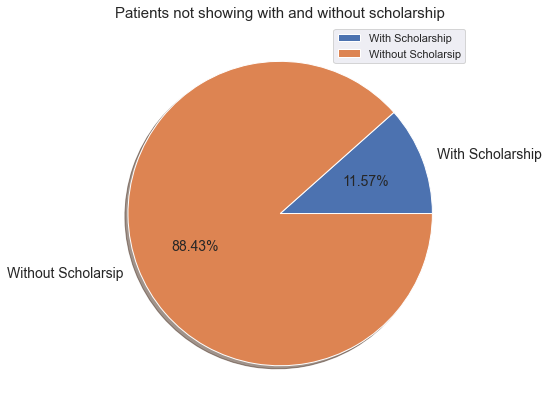

In [161]:
# With scholarship & missed
all_noshow = noshow_df.shape[0]
all_scholar = df.query('Scholarship == 1').shape[0]
noshow_scholar = noshow_df.query('Scholarship == 1').shape[0]
percentage_noshow_scholar = noshow_scholar*100/all_noshow
print('{} patient(s) have scholarships and {} of them missed the appointment'.format(all_scholar, noshow_scholar))

# Without scholarship and missed
noshow_noscholar = noshow_df.query('Scholarship == 0').shape[0]
all_noscholar = df.query('Scholarship == 0').shape[0]
percentage_noshow_noscholar = noshow_noscholar*100/all_noshow
print('{} patient(s) don\'t have scholarships and {} of them missed the appointment'.format(all_noscholar, noshow_noscholar))

# Plotting: Pie chart
pie_plot([percentage_noshow_scholar, percentage_noshow_noscholar], ['With Scholarship','Without Scholarsip'], "Patients not showing with and without scholarship")



10842 patient(s) have scholarships and 2577 of them missed the appointment
99470 patient(s) don't have scholarships and 19693 of them missed the appointment


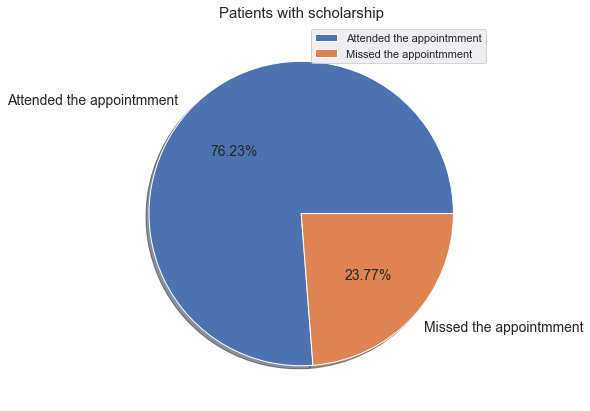

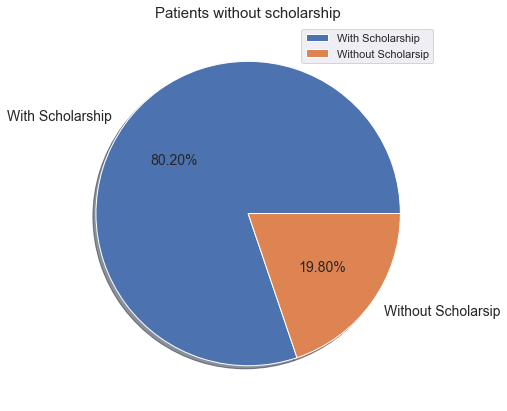

In [162]:
all_noshow = noshow_df.shape[0]
all_scholar = df.query('Scholarship == 1').shape[0]
noshow_scholar = noshow_df.query('Scholarship == 1').shape[0]
percentage_noshow_scholar = noshow_scholar*100/all_scholar
print('{} patient(s) have scholarships and {} of them missed the appointment'.format(all_scholar, noshow_scholar))

noshow_noscholar = noshow_df.query('Scholarship == 0').shape[0]
all_noscholar = df.query('Scholarship == 0').shape[0]
percentage_noshow_noscholar = noshow_noscholar*100/all_noscholar
print('{} patient(s) don\'t have scholarships and {} of them missed the appointment'.format(all_noscholar, noshow_noscholar))


# Plotting: Pie chart
plt.figure(0)
pie_plot([100-percentage_noshow_scholar, percentage_noshow_scholar], ['Attended the appointmment','Missed the appointmment'], "Patients with scholarship")

plt.figure(1)
pie_plot([100-percentage_noshow_noscholar, percentage_noshow_noscholar], ['With Scholarship','Without Scholarsip'], "Patients without scholarship")

plt.show()


#### What do we conclude?
- Only 9.83% of the patients were enrolled in the scholarship program, and about 23% from this percentage didn't show up for their appointments more than those who didn't have scholarships by nearly 4%, so, does having a scholarship has a negative effect on patients?
- Another view is that from those who missed their appointments, only 11% had scholarships, but this doesn't really indicate something important as the patients having scholarships were only 9.83% of the whole population of patients.
- We expect that having a scholarship that gives financial support would result in less percentage of patients not showing for their appointments, but this is not the case here, so, we would search for another indicator with more solid results.

### **Recieving an SMS effect**

35431 patient(s) recieved SMS and 9774 of them missed the appointment
74881 patient(s) didn't recieve SMS and 12496 of them missed the appointment


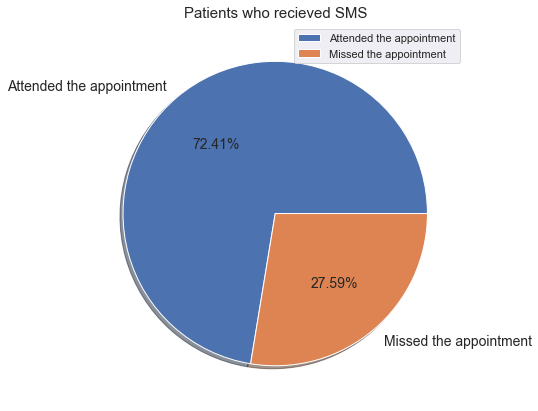

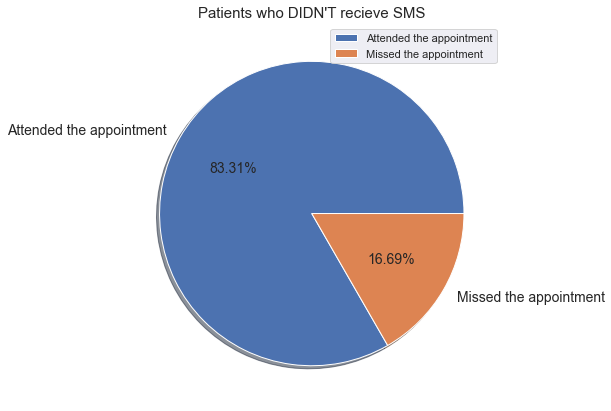

In [163]:
# Percentage of patients not showing while recieving SMS
noshow_sms = noshow_df.query('SMS_received == 1').shape[0]
all_sms = df.query('SMS_received == 1').shape[0]
percentage_noshow_sms = noshow_sms*100/all_sms
print('{} patient(s) recieved SMS and {} of them missed the appointment'.format(all_sms, noshow_sms))

# Percentage of patients not showing while  NOT recieving SMS
noshow_nosms = noshow_df.query('SMS_received == 0').shape[0]
all_nosms = df.query('SMS_received == 0').shape[0]
percentage_noshow_nosms = noshow_nosms*100/all_nosms
print('{} patient(s) didn\'t recieve SMS and {} of them missed the appointment'.format(all_nosms, noshow_nosms))

#Plotting: Pie chart - Recieved SMS
plt.figure(0)
pie_plot([100- percentage_noshow_sms, percentage_noshow_sms], ['Attended the appointment', 'Missed the appointment'], "Patients who recieved SMS")

#Plotting: Pie chart - Didn't recieve SMS
plt.figure(1)
pie_plot([100- percentage_noshow_nosms, percentage_noshow_nosms], ['Attended the appointment', 'Missed the appointment'], "Patients who DIDN\'T recieve SMS")

plt.show()



#### The same problem again..
- So those who recieved an SMS also showed a behaviour of missing their appointments, but this time the difference between the two percentages is remarkable that we could start thinking that either the data provided isn't complete or the messaging system confused the patients.

### **Analyzing Weekdays**

- In this section I'm going to extract day names from the ScheduledDay column.
- We will start analyzing which days have more patients missing their appointments.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_30068\421855584.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noshow_df['day_of_week'] = df['ScheduledDay'].dt.day_name()


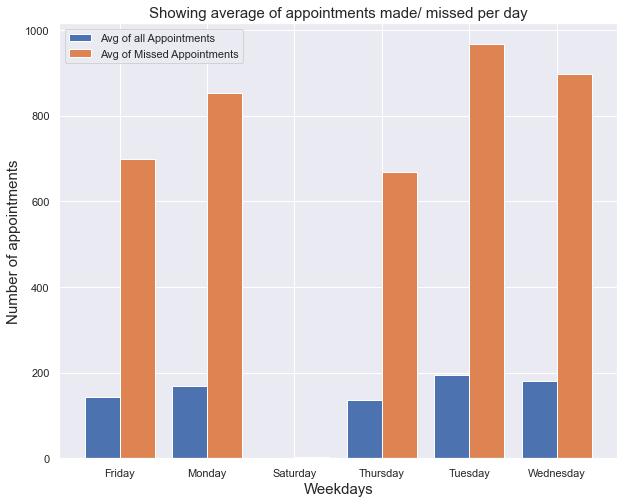

,Tuesday,Wednesday,Monday,Friday,Thursday,Saturday
Total Appointments,26109.000000,24222.000000,23040.000000,18873.000000,18044.000000,24.000000
Missed Appointments,5276.000000,4871.000000,4552.000000,3874.000000,3696.000000,1.000000
Percentage of missing appointments,20.207591,20.109818,19.756944,20.526678,20.483263,4.166667
Appointments daily average,967.000000,897.111111,853.333333,699.000000,668.296296,1.846154
Missed Appointments daily average,195.407407,180.407407,168.592593,143.481481,136.888889,0.076923


In [164]:
# extract month and day of week from Start Time to create new columns
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['day_of_week'] = df['ScheduledDay'].dt.day_name()
noshow_df['day_of_week'] = df['ScheduledDay'].dt.day_name()
df.groupby('day_of_week').mean()


# Average of patients not showing on certain days
no_show_daily_avg =df.groupby(['day_of_week', 'AppointmentDay'], as_index=False).sum().groupby('day_of_week')['no_show'].mean()

# Average of appointments made each day
appt__daily_avg = df.groupby(['day_of_week', 'AppointmentDay'], as_index=False).count().groupby('day_of_week')['no_show'].mean()

# Plotting: Bar chart
days = ['Friday','Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday']
bar_plot(0 , days, no_show_daily_avg, appt__daily_avg, 'Avg of all Appointments', 'Avg of Missed Appointments', "Weekdays", "Number of appointments", "Showing average of appointments made/ missed per day", 'green',10 , 8, 0, 1 )
plt.show()

# Inspecting data about daily appointments
appointments_weekdays = df['day_of_week'].value_counts()
noshow_weekdays = noshow_df['day_of_week'].value_counts()
missing_percent = noshow_weekdays/appointments_weekdays
pd.DataFrame([appointments_weekdays, noshow_weekdays, missing_percent*100, appt__daily_avg, no_show_daily_avg],['Total Appointments','Missed Appointments','Percentage of missing appointments', 'Appointments daily average', 'Missed Appointments daily average'])





#### Conclusions about weekdays comparison
- Brazil have a weekly holiday on Saturday and Sunday, this is why there is no data on sunday and there is only 24 appointment on saturdays, this could be considered as emergency appointments (only 1 appointment missed)
- Tuesday, Wednesday and Monday have the highest number of appointments with tuesday having the highest average number of scheduled appointments (same goes for missed appointments)
- Dropping saturdays, the data shows no tendency of patients to miss their appointments on a certain day.


### **Is not showing for appointments Age related?**

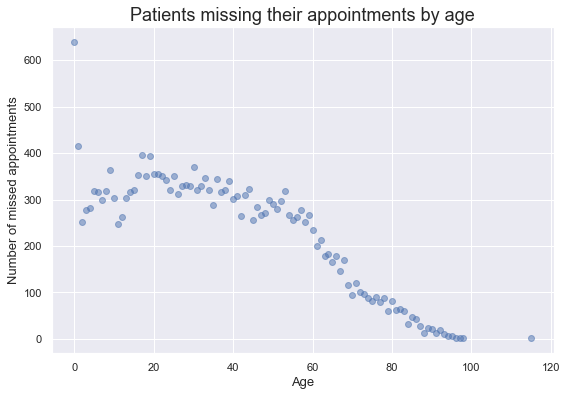

In [166]:
# Preparing data
ages = noshow_df.groupby('Age')['no_show'].sum().index
missed_appts = noshow_df.groupby('Age')['no_show'].sum().values

# Plotting: Scatter plot.
sns.set_theme()
plt.figure(0)
plt.scatter(ages, missed_appts, alpha=0.5)
plt.xlabel("Age", fontsize = 13)
plt.ylabel("Number of missed appointments", fontsize = 13)
plt.title("Patients missing their appointments by age", fontsize = 18)
plt.rcParams["figure.figsize"] = (9,6)
plt.show()

Finally,
(Age) and (Missing appointments) have a negative corelation, as the patient's age increases, he starts to show up for his appointments.

### **Is it increasing in certain neighbourhoods more than the others?**


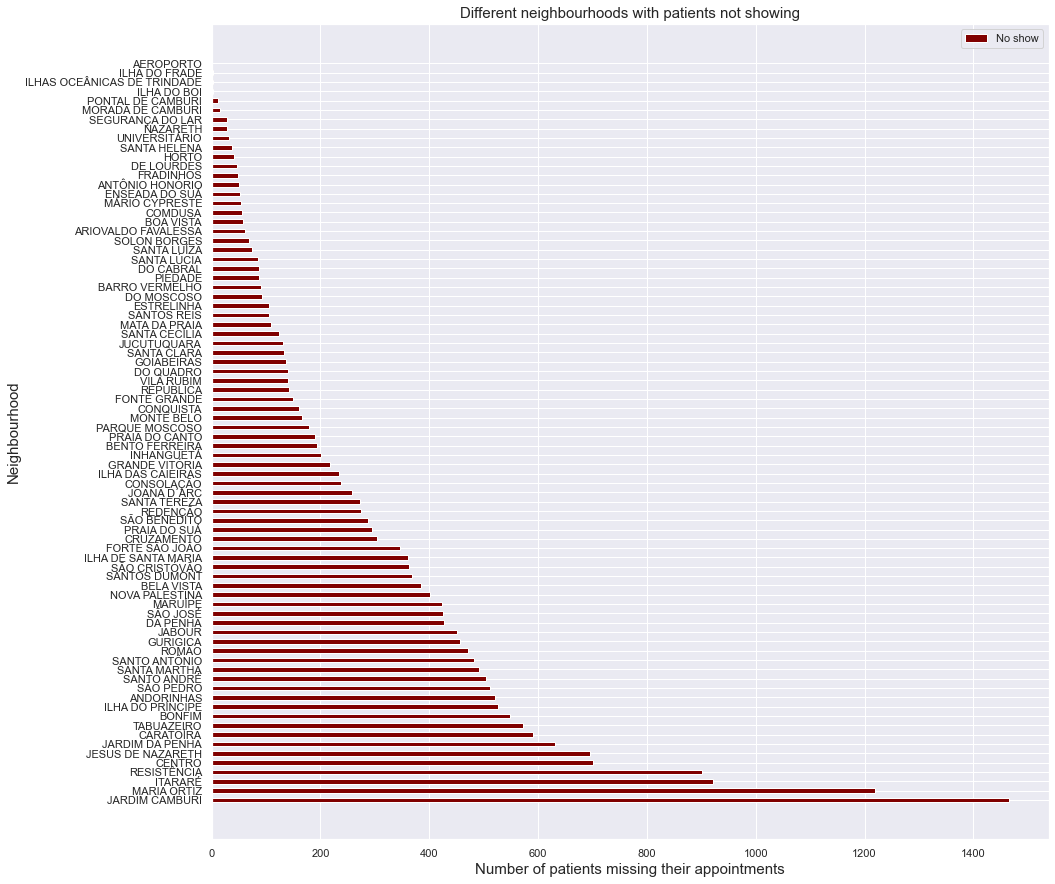

In [167]:
neighb_appts = noshow_df['Neighbourhood'].value_counts().values
names = noshow_df['Neighbourhood'].value_counts().index

# Plotting: Bar chart
sns.set_theme()
bar_plot(0, names, neighb_appts, None, 'No show', None, "Number of patients missing their appointments", "Neighbourhood", "Different neighbourhoods with patients not showing", 'maroon', 15, 15, 0, 0 )
plt.show()

<a id='conclusions'></a>
## Conclusions

**Finally, summarizing our findings and the results that have been performed:**


- The dataset limited the progress in many aspects, more work could've been done on factors like whether the patient has scholarship or not, or if he recieved an SMS or not, these factors didn't return the expected results.
- When analyzing weekdays, there wasn't a day that showed much higher tendency for the patients to make appointments or even miss them. Although mid-week days as Tuesday, Wednesday and Monday have the highest number of appointments and missed appointments.
- Factors like recieving an SMS and having a scholarship with financial aid didn't serve their purpose, according to the dataset, as patients showed similar or even more tendency (than those without these factors) to miss their appointments
- Patients with Hypertension were the least to miss their appointments, Alcoholic patients were the most, even if the percentages were close.
- Higher age resulted in less missed appointments, where the age showed negative corelation with not showing for appointments.